In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
# Note you can only unzip once# Use the citipy module to determine city based on latitude and longitude.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination by looping through our list
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

# API 

In [5]:
# Import the requests library to be able to call the API
import requests

# Import the API key from our config.py file 
from config import weather_api_key

# Starting URL for Weather Map API Call.
# when making the call we need to adhere to the format specified by the site
# i.e. https://openweathermap.org/current
# i.e. one of the specifications is unit which can be imperial, metric or standard 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city based on the format specified 
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 46.02,
  'feels_like': 33.26,
  'temp_min': 43,
  'temp_max': 48.99,
  'pressure': 1007,
  'humidity': 87},
 'visibility': 3219,
 'wind': {'speed': 19.57, 'deg': 110},
 'rain': {'1h': 1},
 'clouds': {'all': 90},
 'dt': 1616959267,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616927586,
  'sunset': 1616972705},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Get the JSON data by placing the JSON data into a variable 
boston_data = city_weather.json()

In [7]:
# we can then use the keys to obtain the values we want
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 48.99 87 90 19.57


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# initialized at 1 since we want the first iteration of the logging for each recorded response and the set to start at 1.

# Loop through all the cities in the list.
# we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50. 
# To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. 
# We can also retrieve the city from the cities list and add it to the city_url by using indexing
# We create the for loop with the enumerate() method and reference the index and the city in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    # In the conditional statement, we check 
        # if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
            # If the statement is true, then the set_count and the record_count are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # we create the URL endpoint for each city, as before. 
    # However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
    # This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    # we add a print statement that tells us the record count and set count, and the city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count before the next city is processed.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        # We parse the JSON file for the current city.
        # If there is weather data for the city, 
            # we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date 
            # and assign those values to variables
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        # We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    # If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve 
    # City not found. Skipping... is printed.
    # pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
# closing print statement, which will let us know the data retrieval has been completed
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | marapanim
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | pitimbu
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | moron
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | arroio grande
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | haikou
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | bondo
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | gharghoda
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 

Processing Record 34 of Set 4 | frontera
Processing Record 35 of Set 4 | sibolga
Processing Record 36 of Set 4 | celinac
Processing Record 37 of Set 4 | shu
Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | lasa
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | pemangkat
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | roebourne
Processing Record 44 of Set 4 | havoysund
Processing Record 45 of Set 4 | atuona
Processing Record 46 of Set 4 | de-kastri
Processing Record 47 of Set 4 | vaitape
Processing Record 48 of Set 4 | corowa
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | teguldet
Processing Record 1 of Set 5 | cap malheureux
Processing Record 2 of Set 5 | baykit
Processing Record 3 of Set 5 | ipixuna
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | nhulunbuy
Processing Record 7 of Set 5 | tabialan
City not found. Skipping...
Proce

Processing Record 22 of Set 8 | ocos
Processing Record 23 of Set 8 | tapaua
City not found. Skipping...
Processing Record 24 of Set 8 | martapura
Processing Record 25 of Set 8 | naze
Processing Record 26 of Set 8 | honningsvag
Processing Record 27 of Set 8 | lerwick
Processing Record 28 of Set 8 | senmonorom
City not found. Skipping...
Processing Record 29 of Set 8 | domoni
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | khasan
Processing Record 33 of Set 8 | dali
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | port hardy
Processing Record 36 of Set 8 | san jose
Processing Record 37 of Set 8 | namibe
Processing Record 38 of Set 8 | praia da vitoria
Processing Record 39 of Set 8 | general pico
Processing Record 40 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 41 of Set 8 | flin flon
Processing Record 42 of Set 8 | cirpan
City not found. Skipping...
Processing Record 43 of Set 8 | epinal

Processing Record 9 of Set 12 | chumikan
Processing Record 10 of Set 12 | kharhial
Processing Record 11 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 12 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 12 | bundaberg
Processing Record 14 of Set 12 | corvallis
Processing Record 15 of Set 12 | joensuu
Processing Record 16 of Set 12 | lillooet
Processing Record 17 of Set 12 | menongue
Processing Record 18 of Set 12 | port hawkesbury
Processing Record 19 of Set 12 | socuellamos
Processing Record 20 of Set 12 | alice springs
Processing Record 21 of Set 12 | mendi
Processing Record 22 of Set 12 | yukhnov
Processing Record 23 of Set 12 | jibuti
Processing Record 24 of Set 12 | kungurtug
Processing Record 25 of Set 12 | anloga
Processing Record 26 of Set 12 | moche
Processing Record 27 of Set 12 | ponoka
Processing Record 28 of Set 12 | faya
Processing Record 29 of Set 12 | cayenne
Processing Record 30 of Set 12 | tahta
Processing Record 31 of

In [9]:
len_city_data = len(city_data)
len_city_data

538

# Creating the DataFrame

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,82.40,78,20,11.50,EC,2021-03-28 19:22:57
1,Vaini,-21.2000,-175.2000,78.80,89,75,9.22,TO,2021-03-28 19:24:15
2,Marapanim,-0.7175,-47.6997,80.74,83,99,6.06,BR,2021-03-28 19:24:20
3,Busselton,-33.6500,115.3333,55.00,94,0,6.29,AU,2021-03-28 19:24:20
4,Pitimbu,-7.4706,-34.8086,84.20,70,75,9.22,BR,2021-03-28 19:24:21
5,Sao Joao Da Barra,-21.6403,-41.0511,86.00,66,20,6.91,BR,2021-03-28 19:20:28
6,Moron,-34.6534,-58.6198,75.20,57,40,6.91,AR,2021-03-28 19:24:21
7,Kahului,20.8947,-156.4700,75.20,64,40,20.71,US,2021-03-28 19:24:21
8,Vila Velha,-20.3297,-40.2925,82.40,65,40,6.91,BR,2021-03-28 19:24:17
9,Mount Gambier,-37.8333,140.7667,57.20,94,90,4.61,AU,2021-03-28 19:21:02


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-03-28 19:22:57,-0.7393,-90.3518,82.40,78,20,11.50
1,Vaini,TO,2021-03-28 19:24:15,-21.2000,-175.2000,78.80,89,75,9.22
2,Marapanim,BR,2021-03-28 19:24:20,-0.7175,-47.6997,80.74,83,99,6.06
3,Busselton,AU,2021-03-28 19:24:20,-33.6500,115.3333,55.00,94,0,6.29
4,Pitimbu,BR,2021-03-28 19:24:21,-7.4706,-34.8086,84.20,70,75,9.22
...,...,...,...,...,...,...,...,...,...
533,Sembe,CG,2021-03-28 19:26:35,1.6481,14.5806,76.96,73,57,2.30
534,Rio Gallegos,AR,2021-03-28 19:23:42,-51.6226,-69.2181,60.80,25,0,12.66
535,Subirana,HN,2021-03-28 19:26:35,15.2000,-87.4500,89.60,51,40,9.22
536,Antigonish,CA,2021-03-28 19:26:35,45.6169,-61.9986,35.01,80,100,14.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." 
# If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame
city_data_df.to_csv(output_data_file, index_label="City_ID")


# Chart Plotting

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

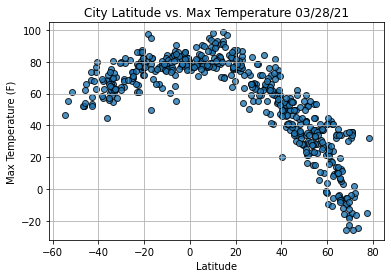

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

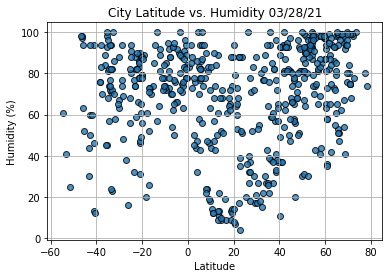

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

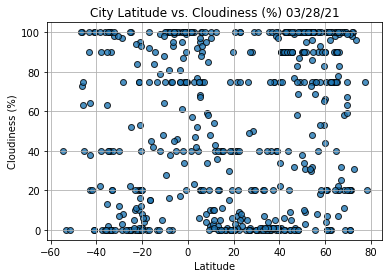

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

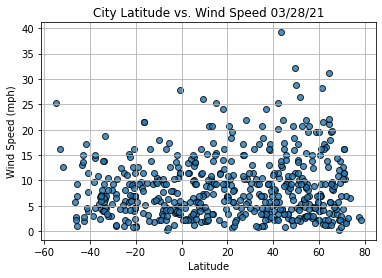

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# our function requires 5 variables/inputs
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data based on specified x and y values
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept (equation).
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    print(f"The r-value is: {r_value:.3f}\nThe p-value is: {p_value:.3f}\nThe std_err is: {std_err:.3f}")

In [53]:
# Create Northern and Southern Hemisphere DataFrames.

# Recall that the .loc function accesses a group of rows and columns in the current DataFrame by
    # an index, labels, or a Boolean array
    # i.e. index13 = city_data_df.loc[13] would return all data on the 13th index (row)    
# therefore, using the .loc function, we can create a DataFrame with row/columns that meet our specified criteria 

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

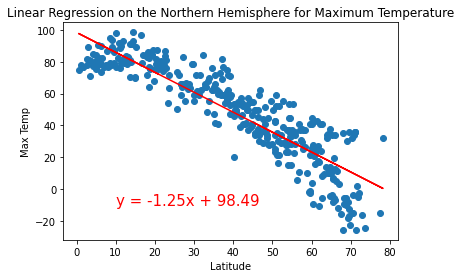

y = -1.25x + 98.49
The r-value is: -0.892
The p-value is: 0.000
The std_err is: 0.033


In [54]:
# 6.4.2: Find the Correlation Between Latitude and Maximum Temperature

# We will use/call the function we've created above
# Linear regression on the Northern Hemisphere by specifying the x and y values 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function and fill in the variables required for the function 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-10))

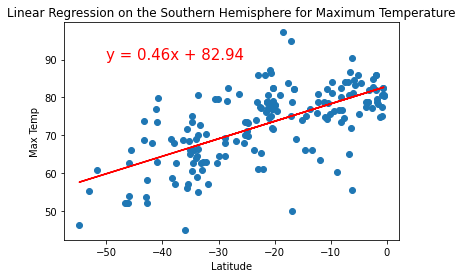

y = 0.46x + 82.94
The r-value is: 0.647
The p-value is: 0.000
The std_err is: 0.041


In [55]:
# 6.4.2: Find the Correlation Between Latitude and Maximum Temperature

# We will use/call the function we've created above
# Linear regression on the Southern Hemisphere by specifying the x and y values 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function and fill in the variables required for the function 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

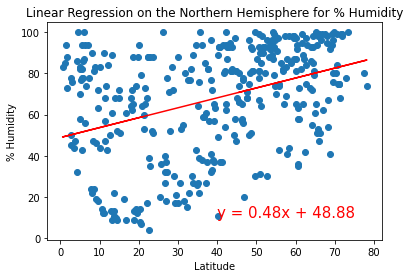

y = 0.48x + 48.88
The r-value is: 0.384
The p-value is: 0.000
The std_err is: 0.061


In [56]:
# 6.4.3: Find the Correlation Between Latitude and Percent Humidity

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

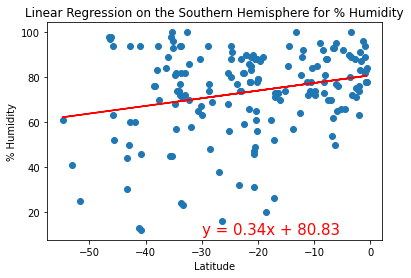

y = 0.34x + 80.83
The r-value is: 0.244
The p-value is: 0.001
The std_err is: 0.103


In [57]:
# 6.4.3: Find the Correlation Between Latitude and Percent Humidity

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,10))

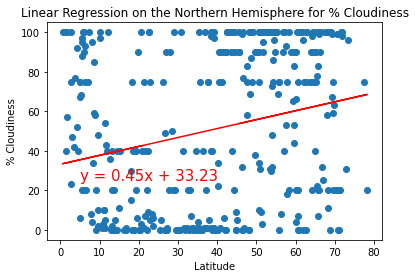

y = 0.45x + 33.23
The r-value is: 0.236
The p-value is: 0.000
The std_err is: 0.098


In [58]:
# 6.4.4: Find the Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,25))

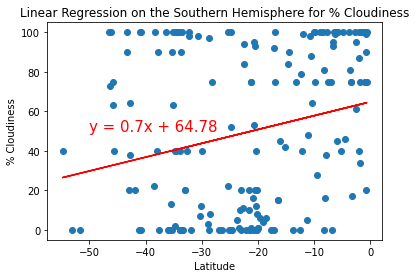

y = 0.7x + 64.78
The r-value is: 0.239
The p-value is: 0.001
The std_err is: 0.216


In [59]:
# 6.4.4: Find the Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,50))

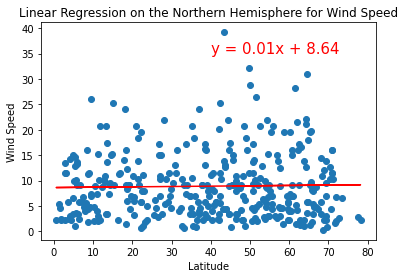

y = 0.01x + 8.64
The r-value is: 0.023
The p-value is: 0.663
The std_err is: 0.016


In [60]:
# 6.4.5: Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

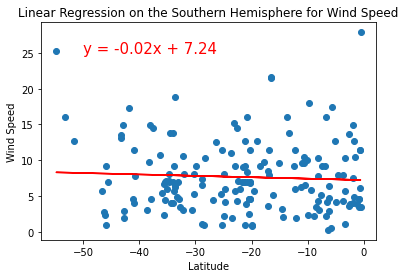

y = -0.02x + 7.24
The r-value is: -0.055
The p-value is: 0.467
The std_err is: 0.027


In [61]:
# 6.4.5: Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))